In [1]:
import numpy as np 
import cv2
import time
import read_position_data
import matplotlib.pyplot as plt
from flax import linen as nn

In [2]:


(
    ground_truth_positions,
    input_data,
    validation_ground_truth_positions,
    validation_input_data,
) = read_position_data.get_data()

(1500, 218, 2)
Saved 1500 frames as a NumPy array with shape (1500, 576, 576, 3).
(3000, 218, 2)
Saved 1500 frames as a NumPy array with shape (1500, 576, 576, 3).
(4500, 218, 2)
Saved 1500 frames as a NumPy array with shape (1500, 576, 576, 3).
(6000, 218, 2)
Saved 1500 frames as a NumPy array with shape (1500, 576, 576, 3).
ground_truth_positions has shape (6000, 218, 2)
input_video_frames has shape (6000, 576, 576, 3)
values in range -1.0 to 1.0


12.002815527113183


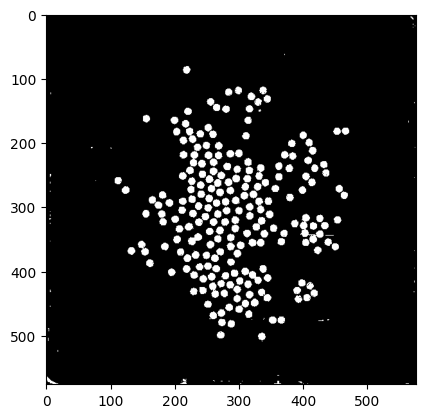

In [41]:
thresholded_image = input_data[0] > 1
print(np.max(input_data[0]))
plt.imshow(thresholded_image, cmap="gray")

In [ ]:
number_keypoints = 0
number_samples = len(input_data)
iteration_start = time.time()
movie_writer = cv2.VideoWriter("blob_detection.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 1, (thresholded_image.shape[1], thresholded_image.shape[0]))
for i in range(number_samples):
    params = cv2.SimpleBlobDetector_Params()
    params.filterByColor = True
    params.blobColor = 255
    # params.filterByCircularity = False
    # params.minCircularity = 0.1
    # params.maxCircularity = 1
    # params.filterByConvexity = False
    # params.minConvexity = 0.01
    # params.maxConvexity = 1
    params.filterByArea = True
    params.maxArea = 130
    params.minArea = 50
    # params.filterByCircularity = True
    # params.minCircularity = 0.9
    # params.maxCircularity = 1
    params.filterByConvexity = False  # Allow irregular shapes
    params.filterByInertia = False  # Allow elongated shapes
    

    detector = cv2.SimpleBlobDetector_create(params)
    image = input_data[i] > 1
    image = np.array(image * 255, dtype=np.uint8) 
    image = nn.avg_pool(image, (2, 2), strides=(1, 1), padding="Same") ==63
    image = np.array(image*255, dtype=np.uint8)
    
    # plt.imshow(image, cmap="gray")
    start = time.time()
    keypoints = detector.detect(image)
    number_keypoints += len(keypoints)
    # print(f"detected {len(keypoints)} keypoints and it took {time.time() - start} seconds, for {i=}") if len(keypoints) > 0 else None
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        radius = int(kp.size / 2 * 1.6)
        cv2.circle(image, (x, y), radius, (0, 0, 0), -1)
    # plt.figure()
    # plt.imshow(image_with_keypoints, cmap="gray")
    # plt.figure()

    # plt.imshow(image, cmap="gray")
    params.filterByArea = True
    params.minArea = 50
    params.maxArea = 2000
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(image)
    # print(f"detected {len(keypoints)} additional keypoints after removing keypoints and it took {time.time() - start} seconds, for {i=}") if len(keypoints) > 0 else None
    image_with_keypoints = cv2.drawKeypoints(image_with_keypoints, keypoints, np.array([]), (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # plt.figure()
    # plt.imshow(image_with_keypoints, cmap="gray")
    movie_writer.write(image_with_keypoints)
    number_keypoints += len(keypoints)*2
iteration_end = time.time()
cv2.destroyAllWindows()
movie_writer.release()

In [ ]:
print(number_keypoints/number_samples, (iteration_end - iteration_start)/number_samples)

212.11116666666666 0.051850780328114826


: 